# Pandas (продолжение)

In [2]:
import pandas as pd
import numpy as np

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [11]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


## Индексы

In [4]:
for col in df.columns:
    mask = pd.isnull(df[col])
    indexes = df[mask][col].index.values
    print (col, indexes)

ord_no [ 1  4  6 10]
purch_amt [1 5 8]
sale_amt [2 5 8]
ord_date [2]
customer_id []
salesman_id [ 3  7 11]


## Среднее

In [ ]:
for i in [1, 4, 6, 10]:
    df.loc[i, "ord_no"] = df["ord_no"].mean()
for i in [1, 5, 8]:
    df.loc[i, "purch_amt"] = df["purch_amt"].mean()
for i in [2, 5, 8]:
    df.loc[i, "sale_amt"] = df["sale_amt"].mean()
for i in [3, 7, 11]:
    df.loc[i, "salesman_id"] = df["salesman_id"].mean()
df

## Медиана

In [ ]:
for i in [1, 4, 6, 10]:
    df.loc[i, "ord_no"] = df["ord_no"].median()
for i in [1, 5, 8]:
    df.loc[i, "purch_amt"] = df["purch_amt"].median()
for i in [2, 5, 8]:
    df.loc[i, "sale_amt"] = df["sale_amt"].median()
for i in [3, 7, 11]:
    df.loc[i, "salesman_id"] = df["salesman_id"].median()
df

## Интерполяция

In [18]:
for column in df.columns:
    if column != 'ord_date':
        df[column] = df[column].interpolate()
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные значения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

In [13]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 1

In [12]:
diamonds[(diamonds.x > 5) & (diamonds.y > 5)  & (diamonds.z > 5)].index

Int64Index([11778, 13002, 13118, 13562, 13757, 13929, 13991, 14138, 14504,
            14645,
            ...
            27738, 27741, 27744, 27745, 27746, 27748, 27749, 48410, 49189,
            49905],
           dtype='int64', length=1457)

## 2, 3

In [13]:
new_diamonds = pd.DataFrame({"carat" : diamonds["carat"].mean(), "table" : diamonds["table"].mean() , "price" : diamonds["price"].mean(), "x" : diamonds["x"].mean(), "y" : diamonds["y"].mean(), "z" : diamonds["z"].mean()}, index = ["Среднее"])
new_diamonds

,carat,table,price,x,y,z
Среднее,0.79794,57.457184,3932.799722,5.731157,5.734526,3.538734


## 4

In [14]:
dm = diamonds.groupby(["cut"]).agg({"price": "mean"})
dm

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


<AxesSubplot: xlabel='cut'>

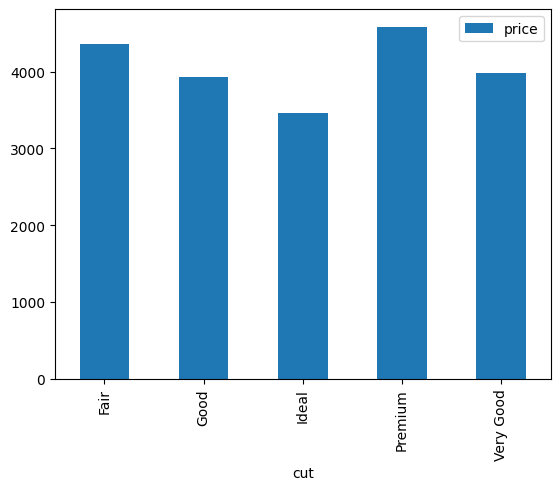

In [15]:
dm.plot(kind="bar")

## 5

<AxesSubplot: xlabel='cut'>

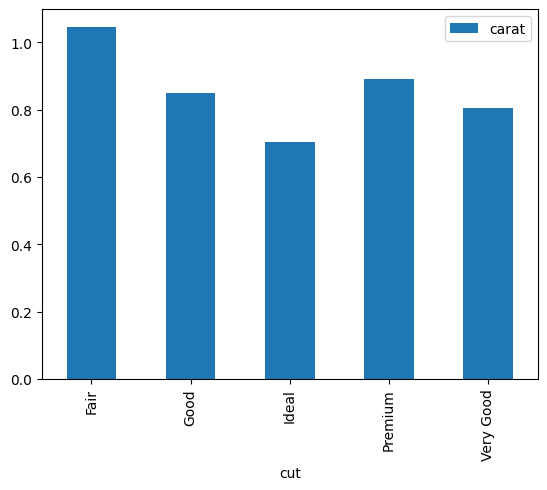

In [16]:
ds = diamonds.groupby(["cut"]).agg({"carat": "mean"})
ds.plot(kind="bar")

## 6

In [15]:
for col in diamonds.columns:
    mask = pd.isnull(diamonds[col])
    ind = diamonds[mask][col].index.values
    print(col, ind)



carat []
cut []
color []
clarity []
depth []
table []
price []
x []
y []
z []


## 7

In [19]:
notnull = diamonds.dropna()
notnull

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 8

In [20]:
import sys
print(sys.getsizeof(notnull))


12805568


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 6 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [22]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1

In [23]:
t = titanic.groupby(["pclass"]).agg({"age":"mean"}).reset_index()
t

,pclass,age
0,1,38.233441
1,2,29.877630
2,3,25.140620


## 4

In [38]:
mean_m = titanic[(titanic["sex"] == "male'") & (titanic["survived"] == 1)]["age"].mean()
mean_f = titanic[(titanic["sex"] == "female") & (titanic["survived"] == 1)]["age"].mean()
print("Male:", mean_m)
print("Female:", mean_f)

Male: nan
Female: 28.84771573604061


## 6

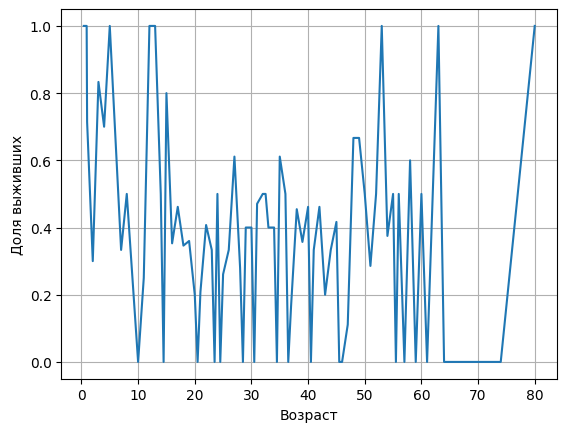

In [39]:
import matplotlib.pyplot as plt
Data = titanic.groupby(["age"])["survived"].mean()
plt.xlabel("Возраст")
plt.ylabel("Доля выживших")
plt.grid(True)
plt.plot(Data)



## 7

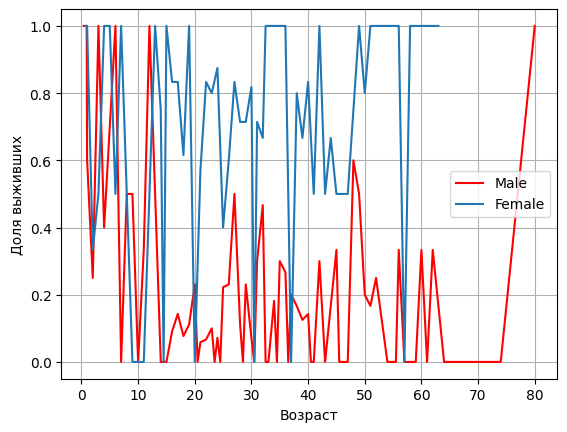

In [40]:
Data_m = titanic[titanic["sex"] == "male"].groupby(["age"])["survived"].mean()
Data_f = titanic[titanic["sex"] == "female"].groupby(["age"])["survived"].mean()
plt.xlabel("Возраст")
plt.ylabel("Доля выживших")
plt.grid(True)
plt.plot(Data_m, 'r', label='Male')
plt.plot(Data_f,  label='Female')
plt.legend()


## 8

In [23]:
f = titanic["fare"].sum()
f

28693.9493

## 9, 10: Хм, в таблице нет имен